In [39]:
import random
import copy
import itertools

import numpy as np
import matplotlib.pyplot as plt

In [40]:
def random_population(population_size, individual_size):
    population = np.random.choice([0, 1], size=(population_size, individual_size), replace=True, p=[0.5, 0.5])
    return population

In [41]:
def fitness_alt(individual):
    n = len(individual)
    pattern_a = np.arange(n) % 2
    pattern_b = 1 - pattern_a
    match_a = int(np.sum(individual == pattern_a))
    match_b = int(np.sum(individual == pattern_b))
    return max(match_a, match_b)

In [42]:
def fitness_onemax(individual):
    return int(np.sum(individual))

In [43]:
def selection(population_,values):
    max1, max2 = 0,0
    idx1, idx2 = -1, -1
    for i, num in enumerate(values):
        if num > max1:
            max2, idx2 = max1, idx1
            max1, idx1 = num, i
        elif num > max2:
            max2, idx2 = num, i
    new_population = np.zeros_like(population_)
    new_population[0] = population_[idx1]
    new_population[1] = population_[idx2]
    for i in range(2,len(population_)):
        random_numbers = np.random.randint(0, len(population_), size=2)
        if values[random_numbers[0]] > values[random_numbers[1]]:
            new_population[i] = copy.deepcopy(population_[random_numbers[0]])
        else:
            new_population[i] = copy.deepcopy(population_[random_numbers[1]])
    return new_population

In [44]:
def crossover(population_, crossover_prob=1):
    new_population = np.zeros_like(population_)
    for i in range(len(population_) // 2):
        individual1 = population_[2 * i]
        individual2 = population_[2 * i + 1]

        if random.random() < crossover_prob:
            crossover_point = random.randint(1, len(individual1) - 1)

            new_individual1 = np.concatenate([individual1[:crossover_point], individual2[crossover_point:]], axis=0)
            new_individual2 = np.concatenate([individual2[:crossover_point], individual1[crossover_point:]], axis=0)

        else:
            new_individual1 = individual1
            new_individual2 = individual2

        new_population[2 * i]=new_individual1
        new_population[2 * i + 1] =new_individual2

    return new_population

In [45]:
def mutation(population_,mutation_probablity=0.1):
    new_population = np.zeros_like(population_)
    for i in range(len(population_)):
        individual = population_[i]
        individual = copy.deepcopy(individual)
        for j in range(len(individual)):
            if np.random.random() < mutation_probablity:
                individual[j] = 0 if individual[j] ==1 else 1
        new_population[i] =individual
    return new_population

In [46]:
def mutation_fast(population_,mutations):
    new_population = np.zeros_like(population_)
    for i in range(len(population_)):
        individual = population_[i]
        individual = copy.deepcopy(individual)
        for j in range(random.randint(0,mutations)):
            mutated_item = random.randint(0, len(individual)-1)
            individual[mutated_item] = 0 if individual[mutated_item] ==1 else 1
        new_population[i] =individual
    return new_population

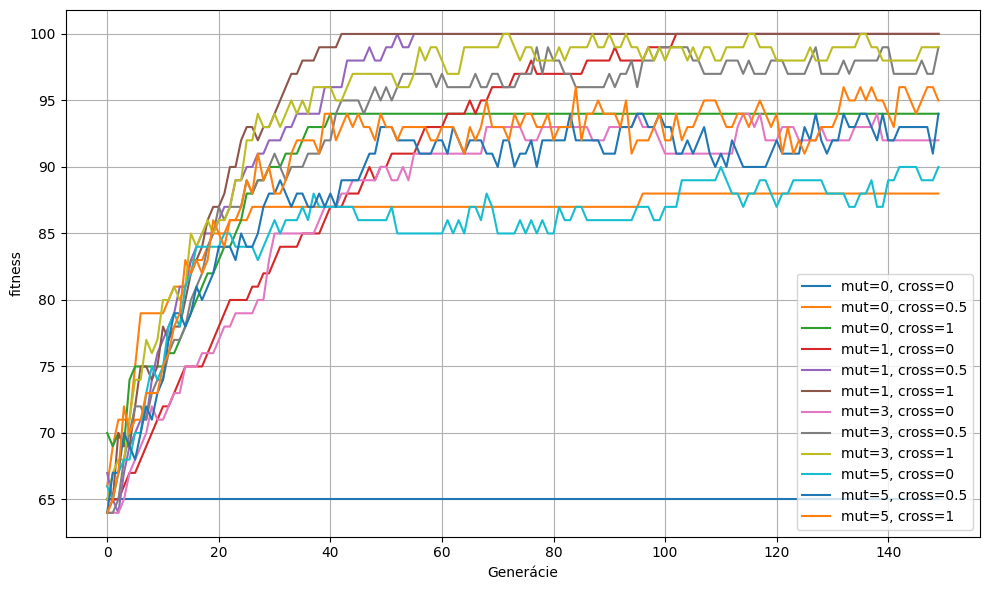

In [47]:
popsize = 250
generations = 150
individual_size = 100

mutation_values = [0,1, 3, 5]
crossover_values = [0, 0.5, 1]

plt.figure(figsize=(10, 6))

for mut, cross in itertools.product(mutation_values, crossover_values):
    population = random_population(popsize, individual_size)
    best_fitness_per_gen = []
    best_fitness_overall = -1
    best_overall = None

    for _ in range(generations):
        fitness_values = np.apply_along_axis(fitness_alt, axis=1, arr=population)
        best_idx = np.argmax(fitness_values)
        if fitness_values[best_idx] > best_fitness_overall:
            best_fitness_overall = fitness_values[best_idx]
            best_overall = population[best_idx].copy()

        best_fitness_per_gen.append(int(fitness_values.max()))

        selected = selection(population, fitness_values)
        crossed = crossover(selected, crossover_prob=cross)
        mutated = mutation_fast(crossed, mutations=mut)
        population = mutated

    label = f"mut={mut}, cross={cross}"
    plt.plot(best_fitness_per_gen, label=label)

plt.xlabel("Generácie")
plt.ylabel("fitness")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("convergence_comparison_Alternate.png", dpi=300)
plt.show()

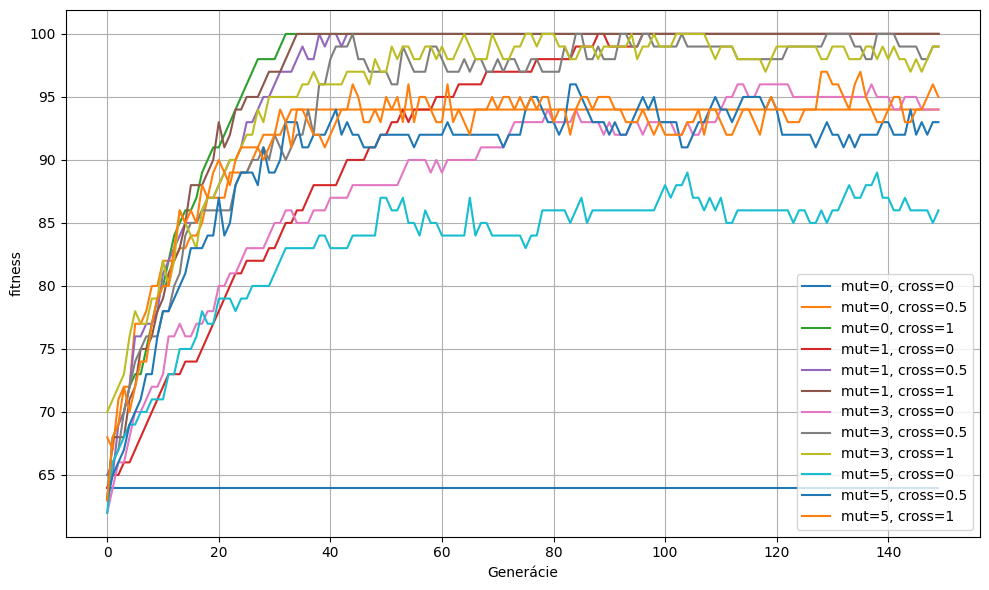

In [48]:

popsize = 500
generations = 150
individual_size = 100

mutation_values = [0,1, 3, 5]
crossover_values = [0, 0.5, 1]

plt.figure(figsize=(10, 6))

for mut, cross in itertools.product(mutation_values, crossover_values):
    population = random_population(popsize, individual_size)
    best_fitness_per_gen = []
    best_fitness_overall = -1
    best_overall = None

    for _ in range(generations):
        fitness_values = np.apply_along_axis(fitness_onemax, axis=1, arr=population)
        best_idx = np.argmax(fitness_values)
        if fitness_values[best_idx] > best_fitness_overall:
            best_fitness_overall = fitness_values[best_idx]
            best_overall = population[best_idx].copy()

        best_fitness_per_gen.append(int(fitness_values.max()))

        selected = selection(population, fitness_values)
        crossed = crossover(selected, crossover_prob=cross)
        mutated = mutation_fast(crossed, mutations=mut)
        population = mutated

    label = f"mut={mut}, cross={cross}"
    plt.plot(best_fitness_per_gen, label=label)

plt.xlabel("Generácie")
plt.ylabel("fitness")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("convergence_comparison_oneMax.png", dpi=300)
plt.show()